# Ridge Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option("display.max_columns", 100)

In [3]:
data = pd.read_csv("Data/data.csv", index_col=[0])
data = data.drop(
    [
        "rpl_theme1",
        "rpl_theme2",
        "rpl_theme3",
        "rpl_theme4",
        "spl_theme1",
        "spl_theme2",
        "spl_theme3",
        "spl_theme4",
        "spl_themes",
        "f_total",
    ],
    axis=1,
)
data

,state,county,area_sqmi,epl_pov,epl_unemp,epl_pci,epl_nohsdp,epl_age65,epl_age17,epl_disabl,epl_sngpnt,epl_minrty,epl_limeng,epl_munit,epl_mobile,epl_crowd,epl_noveh,epl_groupq,rpl_themes,f_pov,f_unemp,f_pci,f_nohsdp,f_theme1,f_age65,f_age17,f_disabl,f_sngpnt,f_theme2,f_minrty,f_limeng,f_theme3,f_munit,f_mobile,f_crowd,f_noveh,f_groupq,f_theme4
0,ALABAMA,Autauga,594.443459,0.5401,0.2745,0.2860,0.4397,0.1850,0.7529,0.7905,0.3792,0.6336,0.5113,0.6017,0.7408,0.2964,0.4846,0.1525,0.4354,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ALABAMA,Baldwin,1589.793007,0.2239,0.3121,0.2057,0.3209,0.6428,0.4323,0.3524,0.1391,0.5158,0.3582,0.9713,0.5339,0.2604,0.1328,0.3018,0.2162,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,ALABAMA,Barbour,885.001636,0.9631,0.9217,0.9481,0.9701,0.4893,0.3327,0.9064,0.9468,0.8965,0.7052,0.2416,0.9280,0.8198,0.8685,0.9449,0.9959,1,1,1,1,4,0,0,1,1,2,0,0,0,0,1,0,0,1,2
3,ALABAMA,Bibb,622.461089,0.4430,0.7895,0.8987,0.7351,0.3200,0.2846,0.6074,0.1706,0.6390,0.2270,0.4317,0.9207,0.0981,0.5441,0.9214,0.6003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2
4,ALABAMA,Blount,644.830460,0.4723,0.2611,0.7561,0.8405,0.4715,0.6406,0.3763,0.2961,0.4206,0.7170,0.1512,0.8816,0.3703,0.2420,0.1165,0.4242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,WYOMING,Sweetwater,10426.975725,0.3127,0.4490,0.1497,0.2668,0.0293,0.9150,0.2041,0.7679,0.5680,0.7052,0.7307,0.8306,0.4817,0.0503,0.2582,0.3701,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3138,WYOMING,Teton,3996.844622,0.0522,0.0264,0.0051,0.0548,0.1334,0.1506,0.0060,0.2216,0.5400,0.9000,0.8109,0.1442,0.9688,0.0503,0.7561,0.1127,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1
3139,WYOMING,Uinta,2081.719807,0.3430,0.6032,0.4443,0.1347,0.0675,0.9685,0.6488,0.2665,0.4136,0.4642,0.7453,0.8816,0.7249,0.1971,0.2582,0.4522,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3140,WYOMING,Washakie,2238.672972,0.3360,0.6207,0.4035,0.3792,0.7380,0.7122,0.4448,0.2961,0.5330,0.2270,0.1958,0.5384,0.4457,0.3715,0.4995,0.3732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
X = data.iloc[:, 2:18]
y = data["rpl_themes"]
X_scaled = pd.DataFrame(data["area_sqmi"])
list_numerical = X.columns

(-48.900000000000006, 1048.9, -0.027574754139872364, 0.1787780598450686)

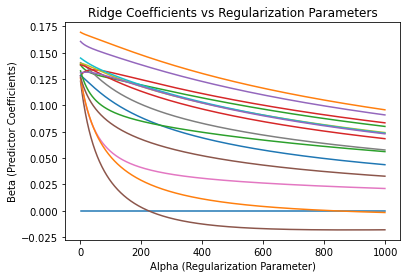

In [24]:
coef = []
alphas = range(1,1000)

for a in alphas:
  ridgereg = Ridge(alpha=a)
  ridgereg.fit(X,y)
  coef.append(ridgereg.coef_)

## Make plot of Beta as a function of Alpha
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(alphas,coef)
ax.set_xlabel('Alpha (Regularization Parameter)')
ax.set_ylabel('Beta (Predictor Coefficients)')
ax.set_title('Ridge Coefficients vs Regularization Parameters')
ax.axis('tight')

In [25]:
# Ridge Regression
warnings.filterwarnings("ignore")  # Warnings about using iloc

# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize Values
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

2

In [26]:
ridge = Ridge(alpha = 2)
ridge.fit(X_train, y_train)             
pred = ridge.predict(X_test)           
print(pd.Series(ridge.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred))      
print("R squared training set", round(ridge.score(X_train, y_train), 2))
print("R squared test set", round(ridge.score(X_test, y_test), 2))

area_sqmi     0.000644
epl_pov       0.048810
epl_unemp     0.040681
epl_pci       0.037622
epl_nohsdp    0.047481
epl_age65     0.036383
epl_age17     0.036754
epl_disabl    0.038795
epl_sngpnt    0.040231
epl_minrty    0.041173
epl_limeng    0.039192
epl_munit     0.036140
epl_mobile    0.039140
epl_crowd     0.040490
epl_noveh     0.037512
epl_groupq    0.037401
dtype: float64
0.0012738529638996266
R squared training set 0.98
R squared test set 0.98


In [27]:
# Compare with OLS
ridge = Ridge(alpha = 0)
ridge.fit(X_train, y_train)             
pred = ridge.predict(X_test)           
print(pd.Series(ridge.coef_, index = X.columns)) 
print(mean_squared_error(y_test, pred))  

area_sqmi     0.000638
epl_pov       0.048820
epl_unemp     0.040712
epl_pci       0.037592
epl_nohsdp    0.047504
epl_age65     0.036539
epl_age17     0.036880
epl_disabl    0.038796
epl_sngpnt    0.040232
epl_minrty    0.041180
epl_limeng    0.039213
epl_munit     0.036251
epl_mobile    0.039210
epl_crowd     0.040494
epl_noveh     0.037509
epl_groupq    0.037474
dtype: float64
0.001273271553937894
